# Network Dynamics: Node Centrality 

## Introduction

Think about your social network on , say, Facebook.There will be certain common individuals who perform certain important functions i.e. likes , shares and comments etc. Also, there could be some super connected individuals who are connected to many other people OR people who aggressively post to Facebook. These people could be helpful during say, certain information dissemination activity when required. Alternatively, if this were a disease contact network, identifying key individuals with a higher degree of contact would be useful in stopping the spread of diseases, a webpage on your site that is catching most attention etc.  How would one identify these nodes, having a central location in your network? . This is the question we try to answer with centrality measures. 


## Objectives

You will be able to:

* Understand and explain network centrality and its importance in graph analysis
* Understand and calculate Degree, Closeness, Betweenness and Eigenvector centrality measures
* Describe the use case for several centrality measures

## Network Centrality 

The notion of centrality helps us identify Which nodes are most 'central' in a given network. Definition of 'central' varies by context/purpose of the analysis and situation. It could be based of number of connections or with a discrimination between incoming and outgoing connections from a node. A local measure for calculating centrality on these lines is the "Degree" of a node.

### Degree Centrality 

The **degree** of a node is the number of other nodes to which it is connected. 

<img src="degree.jpg" width=600>

NetworkX's degree centrality is calculated by taking the degree of the node and dividing by `n-1` where where `n` is the number of nodes in `G`.

$$ {C_D (u)} = \frac{deg(u)}{{n-1}} $$

__NOTE__: In directed graphs, both in-degree and out-degree centrality can be calculated and analyzed.


Let's load our Grey's anatomy romatic encounters graph we created earlier and calculate this measure. 

```python
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load GA graph and display 
GA = nx.read_gexf('ga_graph.gexf')
plt.figure(3,figsize=(9,5)) 
nx.draw(GA, with_labels=True)
plt.show()
```

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


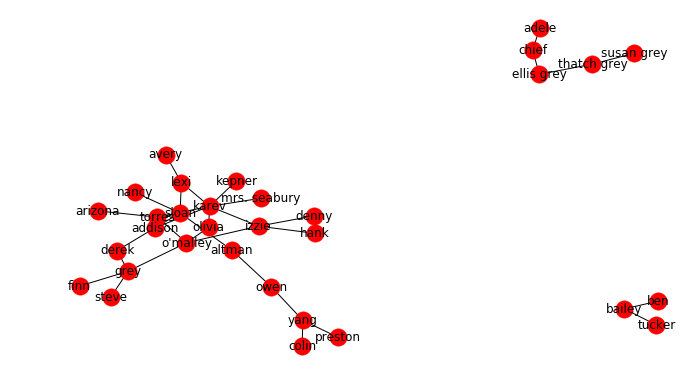

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load GA graph and display 
GA = nx.read_gexf('ga_graph.gexf')
plt.figure(3,figsize=(9,5)) 
nx.draw(GA, with_labels=True)
plt.show()

Let's find the degree of our main character `Grey`.

```python
# Get the degree of a node
GA.degree("grey")
```

In [3]:
# Get the degree of a node
GA.degree("grey")

4

This shows that we have 4 connections to the node 'grey'. Likewise, we can find the degree of each cast member.

```python
# Get degree for whole network
print(GA.degree())
```

In [4]:
# Get degree for whole network
print(GA.degree())

[('lexi', 3), ('susan grey', 1), ('denny', 1), ('ben', 1), ('finn', 1), ('adele', 1), ('yang', 3), ('ellis grey', 2), ('arizona', 1), ('addison', 3), ("o'malley", 4), ('thatch grey', 2), ('altman', 2), ('tucker', 1), ('karev', 7), ('hank', 1), ('mrs. seabury', 1), ('owen', 2), ('kepner', 1), ('grey', 4), ('bailey', 2), ('olivia', 2), ('torres', 4), ('steve', 1), ('nancy', 1), ('colin', 1), ('derek', 2), ('izzie', 4), ('chief', 2), ('sloan', 5), ('avery', 1), ('preston', 1)]


Let's see the top 5 nodes with high degree value
```python
# Here's the top 5 nodes
sorted(GA.degree(), key=lambda x:x[1], reverse=True)[:5]
```

In [5]:
# Here's the top 5 nodes
sorted(GA.degree(), key=lambda x:x[1], reverse=True)[:5]

[('karev', 7), ('sloan', 5), ("o'malley", 4), ('grey', 4), ('torres', 4)]

Knowing this number is good start, it is also a good idea to normalize degree values between zero and one so that they can be more easily compared to one another, and that gives us degree centrality measure.

For the **degree centrality** measure, the normalized interpretion works as below:  

> _What percentage of nodes is this node connected to?_

Or for our Grey's Anatomy example: 

> _What percentage of the cast has this character been romantically invovled with?_



Let's calculate the degree centrality for Grey using the formula above.


```python
# Degree for the 'Grey' node
degree_grey = GA.degree("grey")  # 4 romantic partners

# Total number of nodes (excluding Grey) 
total_nodes_minus_grey = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Grey
degree_centrality_grey = (degree_grey / total_nodes_minus_grey)
print("Calculated degree centrality for Grey:", degree_centrality_grey)
```

In [7]:
# Degree for the 'Grey' node
degree_grey = GA.degree("grey")  # 4 romantic partners

# Total number of nodes (excluding Grey) 
total_nodes_minus_grey = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Grey
degree_centrality_grey = (degree_grey / total_nodes_minus_grey)
print("Calculated degree centrality for Grey:", degree_centrality_grey)

Calculated degree centrality for Grey: 0.12903225806451613


Now let's use networkx's built in method to calculate this

```python
# Degree Centrality in networkx
print("Networkx degree centrality for Grey:", nx.degree_centrality(GA)["grey"])
```

In [8]:
# Degree Centrality in networkx
print("Networkx degree centrality for Grey:", nx.degree_centrality(GA)["grey"])

Networkx degree centrality for Grey: 0.12903225806451613


Great, our values match well. Let's now find the degree centrality for all characters.

```python
# Degree Centrality for all characters
degree_centrality = nx.degree_centrality(GA)
print(degree_centrality)
```

In [9]:
# Degree Centrality for all characters
degree_centrality = nx.degree_centrality(GA)
print(degree_centrality)

{'lexi': 0.0967741935483871, 'susan grey': 0.03225806451612903, 'denny': 0.03225806451612903, 'ben': 0.03225806451612903, 'finn': 0.03225806451612903, 'adele': 0.03225806451612903, 'yang': 0.0967741935483871, 'ellis grey': 0.06451612903225806, 'arizona': 0.03225806451612903, 'addison': 0.0967741935483871, "o'malley": 0.12903225806451613, 'thatch grey': 0.06451612903225806, 'altman': 0.06451612903225806, 'tucker': 0.03225806451612903, 'karev': 0.22580645161290322, 'hank': 0.03225806451612903, 'mrs. seabury': 0.03225806451612903, 'owen': 0.06451612903225806, 'kepner': 0.03225806451612903, 'grey': 0.12903225806451613, 'bailey': 0.06451612903225806, 'olivia': 0.06451612903225806, 'torres': 0.12903225806451613, 'steve': 0.03225806451612903, 'nancy': 0.03225806451612903, 'colin': 0.03225806451612903, 'derek': 0.06451612903225806, 'izzie': 0.12903225806451613, 'chief': 0.06451612903225806, 'sloan': 0.16129032258064516, 'avery': 0.03225806451612903, 'preston': 0.03225806451612903}


We can now identify top five characters from the cast with most encounters

```python

# Top 5. Percent of cast
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
```

In [10]:
# Top 5. Percent of cast
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('karev', 0.22580645161290322),
 ('sloan', 0.16129032258064516),
 ("o'malley", 0.12903225806451613),
 ('grey', 0.12903225806451613),
 ('torres', 0.12903225806451613)]

So same as the degree, only normalized. It is always a good idea to save the degree or any other centrality measures back to the graph as a node attribute for later analysis. 

```python
# apply measurements back to Graph
for k, v in degree_centrality.items():
#     GA.add_node(k)
    GA.node[k]['degree_centrality'] = v
GA.node['karev']
```

In [11]:
# apply measurements back to Graph
for k, v in degree_centrality.items():
#     GA.add_node(k)
    GA.node[k]['degree_centrality'] = v
GA.node['karev']

{'label': 'karev', 'degree_centrality': 0.22580645161290322}

## Closeness Centrality
Closeness Centrality measures how many "hops" a node would take to reach **every other node** in a network (taking the shortest path). It can be informally thought as 'average distance' to all other nodes. This "Far-ness" is then transformed into "nearness" as the reciprocal of farness.  That is, nearness = one divided by farness.  "Nearness" can be further standardized by norming against the minimum possible nearness for a graph of the same size and connection.

<img src="close.png" width = 500>

Closeness is the reciporical of of the *average* value, which normalizes the value in a 0 to 1 range. 

$$ C_C (u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)} $$

If you again take the reciporical of this equation, you'll find the *average* distance to all other nodes.

__Why should we care about closeness centrality?__

> Degree centrality measures might be criticized because they only take into account the immediate ties that an node has, or the ties of the nodes' neighbors, rather than indirect ties to all others nodes. A node might be tied to a large number of others, but those others might be rather disconnected from the network. In a case like this, the node could be quite central, but only in a local neighborhood. [[Source](http://www.faculty.ucr.edu/~hanneman/nettext/C10_Centrality.html#Closeness)]

In our example, closeness centrality can help us understand a number of phenomenon. For example we can check which which characters have the greatest potential to spread an infectous disease or STD across the cast.

### Calculate Shortest Path 
Let's calculate the closeness centrality for Grey. First we'll start by getting the shortest paths between Grey and all other characters.

```python
# Shortest path between Grey and other characters
grey_shortest_path = dict(nx.shortest_path_length(GA))['grey']
grey_shortest_path
```

In [12]:
# Shortest path between Grey and other characters
grey_shortest_path = dict(nx.shortest_path_length(GA))['grey']
grey_shortest_path

{'grey': 0,
 'finn': 1,
 "o'malley": 1,
 'steve': 1,
 'derek': 1,
 'izzie': 2,
 'olivia': 2,
 'torres': 2,
 'addison': 2,
 'denny': 3,
 'karev': 3,
 'hank': 3,
 'arizona': 3,
 'sloan': 3,
 'lexi': 4,
 'mrs. seabury': 4,
 'kepner': 4,
 'altman': 4,
 'nancy': 4,
 'avery': 5,
 'owen': 5,
 'yang': 6,
 'colin': 7,
 'preston': 7}

Now we can go ahead and caluclate the closeness centrality for Grey using the formula above

```python
# Sum of the shortest paths to all other characters
grey_sum_shortest_path = sum(grey_shortest_path.values())  # 77

# Closeness centrality for Grey
closeness_centrality_grey = (total_nodes_minus_grey / grey_sum_shortest_path)
print("Calculated closeness centrality for Grey:", closeness_centrality_grey)
```

In [16]:
# Sum of the shortest paths to all other characters
grey_sum_shortest_path = sum(grey_shortest_path.values())  # 77

# Closeness centrality for Grey
closeness_centrality_grey = (total_nodes_minus_grey / grey_sum_shortest_path)
print("Calculated closeness centrality for Grey:", closeness_centrality_grey)

Calculated closeness centrality for Grey: 0.4025974025974026


Let's bring in networkx's built in method to calculate , and see if we calculated it right 

```python
# Closeness centrality with networkx
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])
```

In [17]:
# Closeness centrality with networkx
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

Networkx closeness centrality for Grey: 0.2216170925848345


<img src="what.jpg" width=300>

These dont match. What really happened ?

This mismatch is because of the character relationship graph is not fully connected. (i.e., there are groups of characters that do not have relationships with one another).

In [55]:
# Code here

[{'addison',
  'altman',
  'arizona',
  'avery',
  'colin',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'owen',
  'preston',
  'sloan',
  'steve',
  'torres',
  'yang'},
 {'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'},
 {'bailey', 'ben', 'tucker'}]

To correct for this, we will use the number of nodes in the `Grey` subgraph instead of the total number of nodes to calculated degree centrality.  Additionally, we'll normalized to `(n-1)/(|G|-1)` where `n` is the number of nodes in the connected part of graph containing the node.

```python
# Number of nodes in Grey subgraph, excluding Grey
total_nodes_minus_grey_sub = len(grey_shortest_path)-1  

# Closeness centrality for Grey (unnormalized)
closeness_centrality_grey = (total_nodes_minus_grey_sub / grey_sum_shortest_path) 
print("Calculated closeness centrality for Grey (Un-normalized):", closeness_centrality_grey)

# Closeness centrality for Grey (normalized)
closeness_centrality_grey_normalized = closeness_centrality_grey * (total_nodes_minus_grey_sub/total_nodes_minus_grey)
print("Calculated closeness centrality for Grey (normalized):", closeness_centrality_grey_normalized)

# In networkx
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])


```

In [24]:
# Number of nodes in Grey subgraph, excluding Grey
total_nodes_minus_grey_sub = len(grey_shortest_path)-1  

# Closeness centrality for Grey (unnormalized)
closeness_centrality_grey = (total_nodes_minus_grey_sub / grey_sum_shortest_path) 
print("Calculated closeness centrality for Grey (Un-normalized):", closeness_centrality_grey)

# Closeness centrality for Grey (normalized)
closeness_centrality_grey_normalized = closeness_centrality_grey * (total_nodes_minus_grey_sub/total_nodes_minus_grey)
print("Calculated closeness centrality for Grey (normalized):", closeness_centrality_grey_normalized)

# In networkx
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

Calculated closeness centrality for Grey (Un-normalized): 0.2987012987012987
Calculated closeness centrality for Grey (normalized): 0.2216170925848345
Networkx closeness centrality for Grey: 0.2216170925848345


Spot on, so now we have the same result as networkx. Let's find the closeness centrality for all characters and pick top 5.

```python
# Calculate closeness for all cast and pick top 5
sorted(nx.closeness_centrality(GA).items(), key=lambda x: x[1], reverse=True)[:5]
```

In [27]:
# Calculate closeness for all cast and pick top 5
closeness_centrality = nx.closeness_centrality(GA)
sorted(nx.closeness_centrality(GA).items(), key=lambda x: x[1], reverse=True)[:5]

[('torres', 0.29937747594793435),
 ('addison', 0.2892290869327502),
 ('karev', 0.2892290869327502),
 ('sloan', 0.2892290869327502),
 ("o'malley", 0.2708653353814644)]

In [28]:
closeness_centrality

{'lexi': 0.26253101736972706,
 'susan grey': 0.05161290322580645,
 'denny': 0.18752215526409075,
 'ben': 0.04301075268817204,
 'finn': 0.17236884978820463,
 'adele': 0.05161290322580645,
 'yang': 0.1594814591498342,
 'ellis grey': 0.08602150537634408,
 'arizona': 0.21600653327888933,
 'addison': 0.2892290869327502,
 "o'malley": 0.2708653353814644,
 'thatch grey': 0.07373271889400922,
 'altman': 0.2337604949182501,
 'tucker': 0.04301075268817204,
 'karev': 0.2892290869327502,
 'hank': 0.18752215526409075,
 'mrs. seabury': 0.21067303863002787,
 'owen': 0.19173613628126135,
 'kepner': 0.21067303863002787,
 'grey': 0.2216170925848345,
 'bailey': 0.06451612903225806,
 'olivia': 0.2337604949182501,
 'torres': 0.29937747594793435,
 'steve': 0.17236884978820463,
 'nancy': 0.21067303863002787,
 'colin': 0.13228307076769194,
 'derek': 0.2337604949182501,
 'izzie': 0.24731182795698925,
 'chief': 0.07373271889400922,
 'sloan': 0.2892290869327502,
 'avery': 0.19614386355209493,
 'preston': 0.132283

Now we see that the sequence is slightly different than that we saw in degree centrality, as now are considering subgraphs and connectedness of the graph. 

As before save this measure back to the graph.

```python
# apply measurements back to Graph
for k, v in closeness_centrality.items():
#     GA.add_node(k)
    GA.node[k]['closeness_centrality'] = v
```

In [29]:
# apply measurements back to Graph
for k, v in closeness_centrality.items():
#     GA.add_node(k)
    GA.node[k]['closeness_centrality'] = v

We can measure the nearness and/or farness from this attribute as we explained earlier.

```python
# average distance of torres:
1 / closeness_centrality['torres']
```

In [30]:
# average distance of torres:
1 / closeness_centrality['torres']

3.340264650283554

## Betweeness Centrality

Betweenness centrality measures the **number of times a node acts as a bridge along the shortest path between two other nodes**.  Here nodes that have a high probability to occur on a randomly chosen shortest path between two randomly chosen nodes have a **high betweenness**.

$$ C_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

where ${\sigma(s, t)}$ is total number of shortest paths from node ${s}$ to node ${t}$ and ${\sigma(s, t|v)}$ is the number of those paths that pass through ${v}$ as shown in the example below:

<img src="between.jpg" width=600>

__Why is betweeness centrality important?__

> In order to create influence in a network by sending information, or exchanging transactions, we usually go through an intermediary. For example, let's suppose you want to convince the board to invest in a new product. You must forward my request through your department head, a Manager, and an executive. These people would have a huge influence on whether your request gets acccpted, rejected or delayed. This gives the people who lie "between" you and the chair, power with respect to you. 

While this measure is not relevant to Grey's anatomy dataset, let's just see how to calculate it with an imaginary scenario.

#### To engage with a new romantic partner, a cast member needs permission from at least one of their former partners and they can only send your request through existing partners (eew .. but it will help us understand betweenness). 

Betweeness centrality can tell us which actors had the most effective influence on the requests made by a cast member to another cast member in the network - in a random fashion. 


```python
# Calculate the betweenness centrality 
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality
```

In [31]:
# Calculate the betweenness centrality 
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality

{'lexi': 0.07741935483870968,
 'susan grey': 0.0,
 'denny': 0.0,
 'ben': 0.0,
 'finn': 0.0,
 'adele': 0.0,
 'yang': 0.09247311827956989,
 'ellis grey': 0.008602150537634409,
 'arizona': 0.0,
 'addison': 0.09480286738351255,
 "o'malley": 0.11702508960573477,
 'thatch grey': 0.0064516129032258064,
 'altman': 0.16344086021505377,
 'tucker': 0.0,
 'karev': 0.20487455197132617,
 'hank': 0.0,
 'mrs. seabury': 0.0,
 'owen': 0.12903225806451613,
 'kepner': 0.0,
 'grey': 0.10078853046594982,
 'bailey': 0.002150537634408602,
 'olivia': 0.01064516129032258,
 'torres': 0.14440860215053763,
 'steve': 0.0,
 'nancy': 0.0,
 'colin': 0.0,
 'derek': 0.03860215053763442,
 'izzie': 0.10311827956989245,
 'chief': 0.0064516129032258064,
 'sloan': 0.24810035842293907,
 'avery': 0.0,
 'preston': 0.0}

As earlier , we can sort these values to get our top 5. 

```python
# get top 5 wrt betweenness
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
```

In [32]:
# get top 5 wrt betweenness
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('sloan', 0.24810035842293907),
 ('karev', 0.20487455197132617),
 ('altman', 0.16344086021505377),
 ('torres', 0.14440860215053763),
 ('owen', 0.12903225806451613)]

As a standard pratice we can save these values back to the graph

```python
# apply measurements back to Graph
for k, v in betweeness_centrality.items():
#     GA.add_node(k)
    GA.node[k]['betweeness_centrality'] = v

# Check the graph so far 
GA.node['karev']
```

In [33]:
# apply measurements back to Graph
for k, v in betweeness_centrality.items():
#     GA.add_node(k)
    GA.node[k]['betweeness_centrality'] = v

# Check the graph so far 
GA.node['karev']

{'label': 'karev',
 'degree_centrality': 0.22580645161290322,
 'closeness_centrality': 0.2892290869327502,
 'betweeness_centrality': 0.20487455197132617}

## Eigenvector Centrality

A node is high in eigenvector centrality if it is connected to many other nodes who are themselves well connected. Eigenvector centrality for each node is simply calculated as the proportional eigenvector values of the eigenvector with the largest eigenvalue. Following image shows you a quick comparison between degree and eigenvector centrality. Here node A is connected to more well connected nodes than B and hence shows a higher Eigenvector centrality, although the degree of B is higher than A. 

<img src="eigen.png" width=300>

[Visit here to get a deep dive in the underlying maths](https://www.geeksforgeeks.org/eigenvector-centrality-centrality-measure/), which involves some matrix algebra. We shall use networkx's built in method to calculate this for now. 

```python
# Calculate eigenvector centrality for GA
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality
```

In [34]:
# Calculate eigenvector centrality for GA
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality

{'lexi': 0.2642455341015445,
 'susan grey': -1.215113814834235e-17,
 'denny': 0.08320301854301705,
 'ben': 1.3800518718021882e-16,
 'finn': 0.044220171351811895,
 'adele': 1.6784293834574418e-17,
 'yang': 0.012041089122459393,
 'ellis grey': 1.9193684119236167e-18,
 'arizona': 0.10564201543690802,
 'addison': 0.2784013959452949,
 "o'malley": 0.30201197095059656,
 'thatch grey': -3.209532105241754e-17,
 'altman': 0.10442628192357353,
 'tucker': 1.8883964388113192e-16,
 'karev': 0.5027687871890409,
 'hank': 0.08320301854301719,
 'mrs. seabury': 0.1471588769531373,
 'owen': 0.0340896411263779,
 'kepner': 0.14715887695313737,
 'grey': 0.1510783608855744,
 'bailey': 2.7638447342007303e-16,
 'olivia': 0.2355568515369943,
 'torres': 0.3609262932492619,
 'steve': 0.044220171351811874,
 'nancy': 0.09444834886225358,
 'colin': 0.0035243897348137382,
 'derek': 0.12570740328311916,
 'izzie': 0.2842633865482769,
 'chief': 6.747053657689562e-17,
 'sloan': 0.32268309457542527,
 'avery': 0.07734385472

First Let's just save this measure back to graph as earlier.

```python
# apply measurements back to Graph
for k, v in eigenvector_centrality.items():
    GA.node[k]['eigenvector_centrallity'] = v
# Check the graph so far 
GA.node['karev'] 
```

In [35]:
# apply measurements back to Graph
for k, v in eigenvector_centrality.items():
    GA.node[k]['eigenvector_centrallity'] = v
# Check the graph so far 
GA.node['karev'] 

{'label': 'karev',
 'degree_centrality': 0.22580645161290322,
 'closeness_centrality': 0.2892290869327502,
 'betweeness_centrality': 0.20487455197132617,
 'eigenvector_centrallity': 0.5027687871890409}

We can check this measure with respect to a certain character in the graph by scaling values. Let's find the character with highest eigenvector centrality and scale the others based on this value.  


```python
# Calculate the character with highest eigenvector value
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

# Scale by the most central character (karev) and return top 5 
ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = eigenvector_centrality[k] / max_value[1]
sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)[0:5]
```

In [36]:
# Calculate the character with highest eigenvector value
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

# Scale by the most central character (karev) and return top 5 
ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = eigenvector_centrality[k] / max_value[1]
sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)[0:5]

[('karev', 1.0),
 ('torres', 0.7178772876239704),
 ('sloan', 0.6418121068722917),
 ("o'malley", 0.6006975346244796),
 ('izzie', 0.5653958515157265)]

## Additional Resources

- https://cs.brynmawr.edu/Courses/cs380/spring2013/section02/slides/05_Centrality.pdf
- http://www.faculty.ucr.edu/~hanneman/nettext/C10_Centrality.html#paths

## Summary
<img src="cen.png" width = 600>

In this lesson, we looked at a number of centrality measures with calculations and how to measure tthem in networkx. We also learned to store these as network node attributes which can be used for later analysis. Next we shall see a problem centred around the issue of centrality. 